# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("annual-number-of-deaths-by-cause.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    8254 non-null   object 
 1   Code                                                                                      6206 non-null   object 
 2   Year                                                                                      8254 non-null   int64  
 3   Number of executions (Amnesty International)                                              267 non-null    object 
 4   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  8010 non-null   float64
 5   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

In [118]:
length=len(df)
print(length)

8254


In [131]:
#identify numeric and non numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print('numeric cols',numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print('non_numeric cols',non_numeric_cols)

numeric cols Index(['Year', 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alcohol use disorder

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [ ]:
df.isnull()


,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8250,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8251,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8252,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.dtypes

Entity                                                                                       object
Code                                                                                         object
Year                                                                                          int64
Number of executions (Amnesty International)                                                 object
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    float64
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     float64
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                float64
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       float64
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      float64
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                        float64


In [ ]:
df.isnull().sum()

Entity                                                                                         0
Code                                                                                        2048
Year                                                                                           0
Number of executions (Amnesty International)                                                7987
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                     244
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                      244
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                 244
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                        244
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                       244
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                         244
Deaths - HIV/AIDS - Sex: Both 

In [ ]:
#1 calculate the percentages of missing values by columns.
pct_missing = df.isna().mean()
pct_missing

Entity                                                                                      0.000000
Code                                                                                        0.248122
Year                                                                                        0.000000
Number of executions (Amnesty International)                                                0.967652
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    0.029561
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     0.029561
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                0.029561
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       0.029561
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      0.029561
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                       

<Axes: >

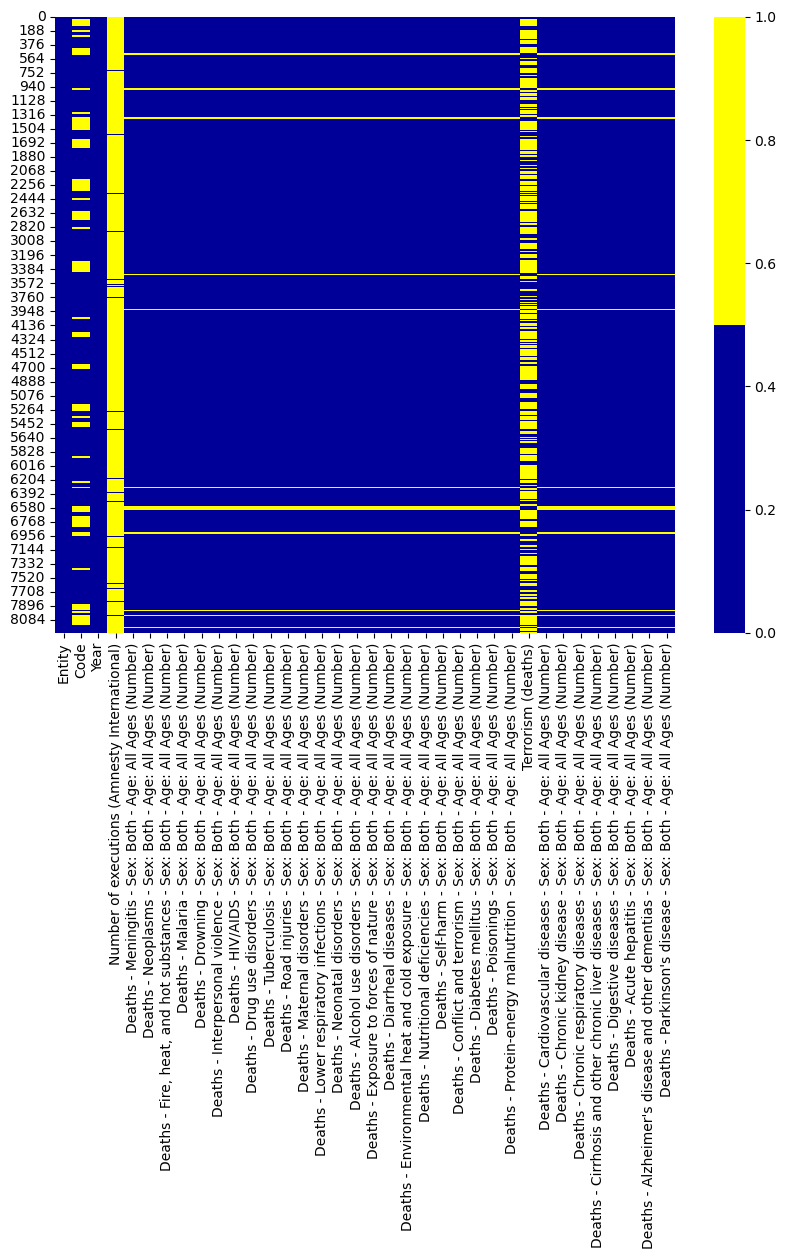

In [ ]:
#2 finding out missed values by heatmap
plt.figure(figsize=(10,8))

cols = df.columns
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

<Axes: >

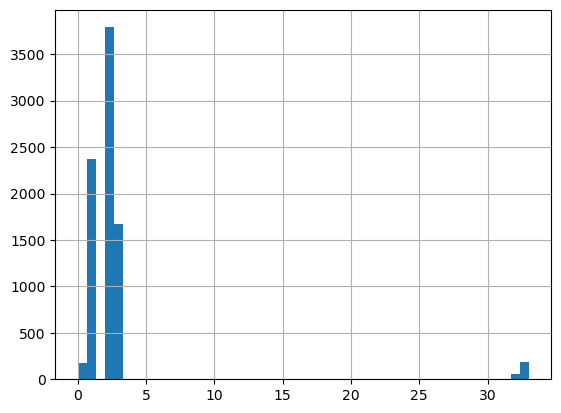

In [ ]:
#3: missing data (by rows) histogram

missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

In [ ]:
# What are the columns with over 30% missing data?
pct_missing[pct_missing > .30]

Number of executions (Amnesty International)    0.967652
Terrorism (deaths)                              0.649746
dtype: float64

In [ ]:
#As per the analysis there are 244 rows with more than 30 columns missing.
df[missing_by_row > 31].shape

(244, 36)

In [ ]:
#Creating a new dataset df_less_missing_rows to only keep observations with less than 10 columns missing
df_less_missing_rows = df.loc[missing_by_row < 10].copy()
df_less_missing_rows.shape

(8010, 36)

In [ ]:
#I am dropping the column 'Number of executions (Amnesty International)' it has 96% missing data and not required for my analysis
df_less_missing_cols = df_less_missing_rows.drop(columns='Number of executions (Amnesty International)')
df_less_missing_cols.shape

(8010, 35)

In [ ]:
pct_missing = df_less_missing_cols.isna().mean()
pct_missing

Entity                                                                                      0.00000
Code                                                                                        0.23221
Year                                                                                        0.00000
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    0.00000
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     0.00000
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                0.00000
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       0.00000
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      0.00000
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                        0.00000
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)                                      0.00000


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [ ]:
#We are using describe method
df_less_missing_cols[numeric_cols].describe()

,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
count,8010.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8.010000e+03,...,8010.000000,2657.000000,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,2004.500000,12909.701124,2.983985e+05,4444.838077,31812.044569,12532.637953,15315.848315,4.725143e+04,3469.958926,5.605527e+04,...,14441.384519,312.544976,5.672777e+05,3.614545e+04,1.315012e+05,4.668634e+04,8.261491e+04,4586.226592,3.923395e+04,9367.016979
std,8.655982,41799.388071,8.643901e+05,12111.913749,123035.872293,40095.990735,42888.544878,1.744798e+05,11186.514866,1.837876e+05,...,47987.721059,1918.088623,1.606918e+06,1.028788e+05,4.174924e+05,1.282383e+05,2.253554e+05,16692.425941,1.179772e+05,27358.717966
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1997.000000,29.000000,1.934250e+03,35.000000,0.000000,58.000000,76.250000,2.600000e+01,7.000000,6.200000e+01,...,10.000000,0.000000,4.348500e+03,2.810000e+02,5.262500e+02,3.040000e+02,5.990000e+02,3.000000,2.010000e+02,55.000000
50%,2004.500000,294.000000,1.033850e+04,244.000000,1.000000,393.500000,494.000000,4.200000e+02,57.000000,9.560000e+02,...,233.500000,5.000000,2.326550e+04,1.651000e+03,2.960500e+03,2.134000e+03,4.032500e+03,47.000000,1.337000e+03,331.000000
75%,2012.000000,3187.750000,9.186925e+04,1470.750000,2462.000000,3017.750000,4372.500000,9.484500e+03,518.750000,1.037775e+04,...,4245.000000,55.000000,1.663318e+05,1.192175e+04,2.815650e+04,1.680225e+04,2.838875e+04,453.750000,1.186775e+04,2954.000000
max,2019.000000,432524.000000,1.007964e+07,129705.000000,961129.000000,460665.000000,463129.000000,1.844490e+06,128083.000000,1.808478e+06,...,656314.000000,44490.000000,1.856251e+07,1.427232e+06,3.974315e+06,1.472012e+06,2.557689e+06,166405.000000,1.623276e+06,362907.000000


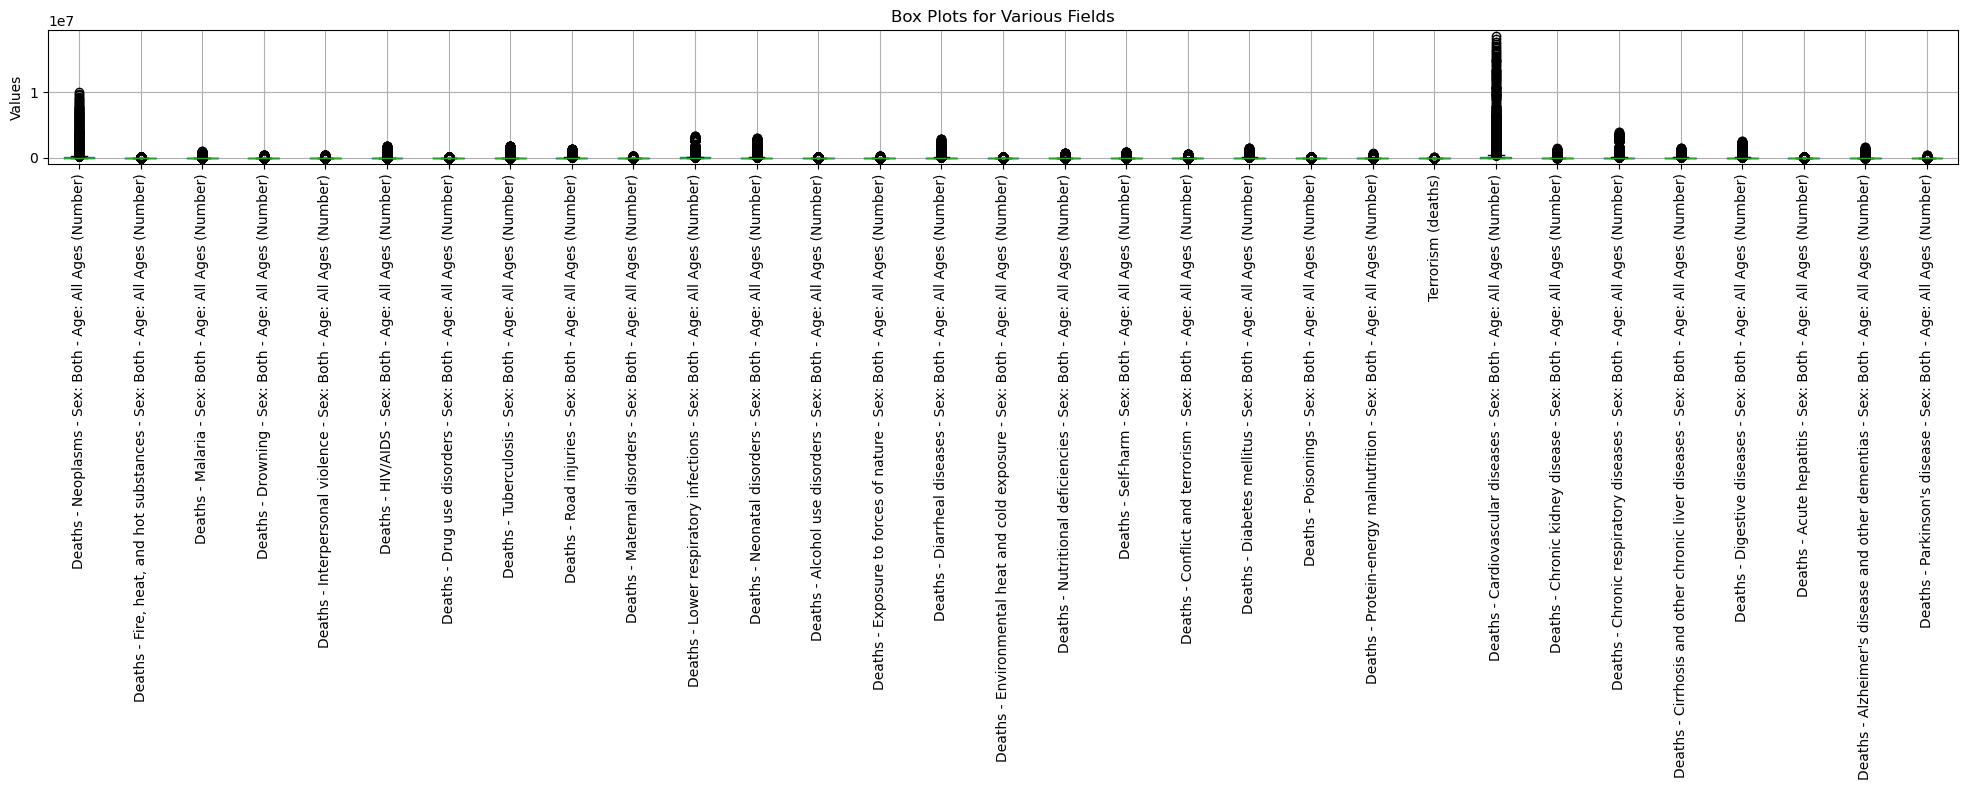

In [ ]:
#Method 2: histogram & box plot

columns_to_plot = [
    'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
    'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
    'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
    'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
    'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
    'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
    'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
    'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
    'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
    'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)',
    'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)',
    'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)',
    'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
    'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)',
    'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)',
    'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
    'Deaths - Poisonings - Sex: Both - Age: All Ages (Number)',
    'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)',
    'Terrorism (deaths)',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
    'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
    'Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)',
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)"
]

# Create a box plot for each column
df_less_missing_cols[columns_to_plot].boxplot(rot=90, figsize=(20, 8))
plt.title('Box Plots for Various Fields')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# I could not find any outliers for the above fields as per the analysis

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [391]:
# I want to clean the data ('Entity') column that are not at country level.
df_less_missing_cols['Entity'].unique()

array(['Afghanistan', 'Africa', 'African Region', 'African Union',
       'Albania', 'Algeria', 'America', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua And Barbuda',
       'Argentina', 'Armenia', 'Asia', 'Australasia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia And Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, And Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Commonwealth',
       'Commonwealth High Income', 'Commonwealth Low Income',
       'Commonwealth Middle Income', 'Comoros', 'Congo', 'Cook Islands',
       '

In [412]:
# List of entities to remove
entities_to_remove = [
    'Africa', 'Low SDI', 'High SDI', 'Europe & Central Asia - World Bank region',
    'Central Europe', 'Timor', 'World Bank Low Income', 'Low-middle SDI', 'USSR',
    'Latin America & Caribbean - World Bank region', "Cote d'Ivoire", 'West Germany (FRG)',
    'High-middle SDI', 'Commonwealth Middle Income', 'Serbia-Montenegro', 'Tropical Latin America',
    'Australasia', 'Southeast Asia, East Asia, and Oceania', 'East Asia & Pacific - World Bank region',
    'North Africa and Middle East', 'Central Latin America', 'International', 'Wales', 'High-income',
    'Western Pacific Region', 'Micronesia (country)', 'Central sub-Saharan Africa', 'World Bank Lower Middle Income',
    'Central Asia', 'Central Europe, Eastern Europe, and Central Asia', 'England', 'Northern Ireland',
    'Southeast Asia', 'South Asia', 'East Asia', 'Middle SDI', 'High-income Asia Pacific', 'High-income North America',
    'Asia', 'Andean Latin America', 'Commonwealth High Income', 'Sub-Saharan Africa - World Bank region',
    'East Germany (GDR)', 'World Bank High Income', 'African Region', 'World Bank Upper Middle Income',
    'European Union', 'Oceania', 'World', 'South Asia - World Bank region', 'South America', 'Scotland',
    'African Union', 'Czechoslovakia', 'Middle East & North Africa', 'Yugoslavia', 'Central America & Caribbean',
    'G20', 'Nordic Region', 'Europe', 'Western Europe', 'Western sub-Saharan Africa', 'Southern sub-Saharan Africa',
    'Commonwealth', 'North America', 'Southern Latin America', 'Eastern Mediterranean Region', 'Caribbean',
    'World (excluding China)', 'OECD Countries', 'South-East Asia Region', 'Bosnia-Herzegovina',
    'Commonwealth Low Income', 'Eastern Europe', 'European Region', 'Eastern sub-Saharan Africa',
    'Australasia & Oceania', 'Sub-Saharan Africa', 'Region of the Americas'
]
filtered_df = df_less_missing_cols[~df_less_missing_cols['Entity'].isin(entities_to_remove)].copy()


In [415]:
filtered_df.tail(10)

,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
8244,Zimbabwe,ZWE,2010,1768.0,10396.0,601.0,4546.0,712.0,1211.0,57069.0,...,2734.0,1.0,16218.0,2006.0,2743.0,2135.0,4152.0,148.0,723.0,214.0
8245,Zimbabwe,ZWE,2011,1803.0,10366.0,615.0,3479.0,743.0,1222.0,45789.0,...,2983.0,0.0,16091.0,1998.0,2721.0,2062.0,4136.0,152.0,722.0,211.0
8246,Zimbabwe,ZWE,2012,1586.0,10454.0,622.0,2763.0,754.0,1243.0,38354.0,...,3065.0,NaN,16083.0,2004.0,2708.0,2011.0,4132.0,152.0,724.0,209.0
8247,Zimbabwe,ZWE,2013,1448.0,10574.0,612.0,3544.0,732.0,1241.0,33646.0,...,2987.0,1.0,16098.0,2013.0,2693.0,1964.0,4107.0,148.0,731.0,209.0
8248,Zimbabwe,ZWE,2014,1422.0,10857.0,615.0,3685.0,734.0,1257.0,31034.0,...,2948.0,0.0,16356.0,2057.0,2715.0,1952.0,4138.0,146.0,741.0,212.0
8249,Zimbabwe,ZWE,2015,1439.0,11161.0,632.0,2518.0,770.0,1302.0,29162.0,...,2990.0,NaN,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0
8250,Zimbabwe,ZWE,2016,1457.0,11465.0,648.0,2050.0,801.0,1342.0,27141.0,...,3027.0,NaN,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0
8251,Zimbabwe,ZWE,2017,1460.0,11744.0,654.0,2116.0,818.0,1363.0,24846.0,...,2962.0,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0
8252,Zimbabwe,ZWE,2018,1450.0,12038.0,657.0,2088.0,825.0,1396.0,22106.0,...,2890.0,NaN,17460.0,2240.0,2849.0,2030.0,4377.0,139.0,795.0,227.0
8253,Zimbabwe,ZWE,2019,1450.0,12353.0,662.0,2068.0,827.0,1434.0,20722.0,...,2855.0,NaN,17810.0,2292.0,2891.0,2065.0,4437.0,136.0,812.0,232.0


In [416]:
filtered_df.shape

(6780, 35)

In [417]:
filtered_df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alcohol 

In [418]:
filtered_df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'America', 'American Samoa',
       'Andorra', 'Angola', 'Antigua And Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic',
       'Central Europe, Eastern Europe, And Central Asia',
       'Central Sub-Saharan Africa', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote D'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic Of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia & Pacific - World Bank Region',
       'Eastern Sub-Saharan Africa', 'Ecuador', 'Egypt', 'El Salvador',
     

<Axes: >

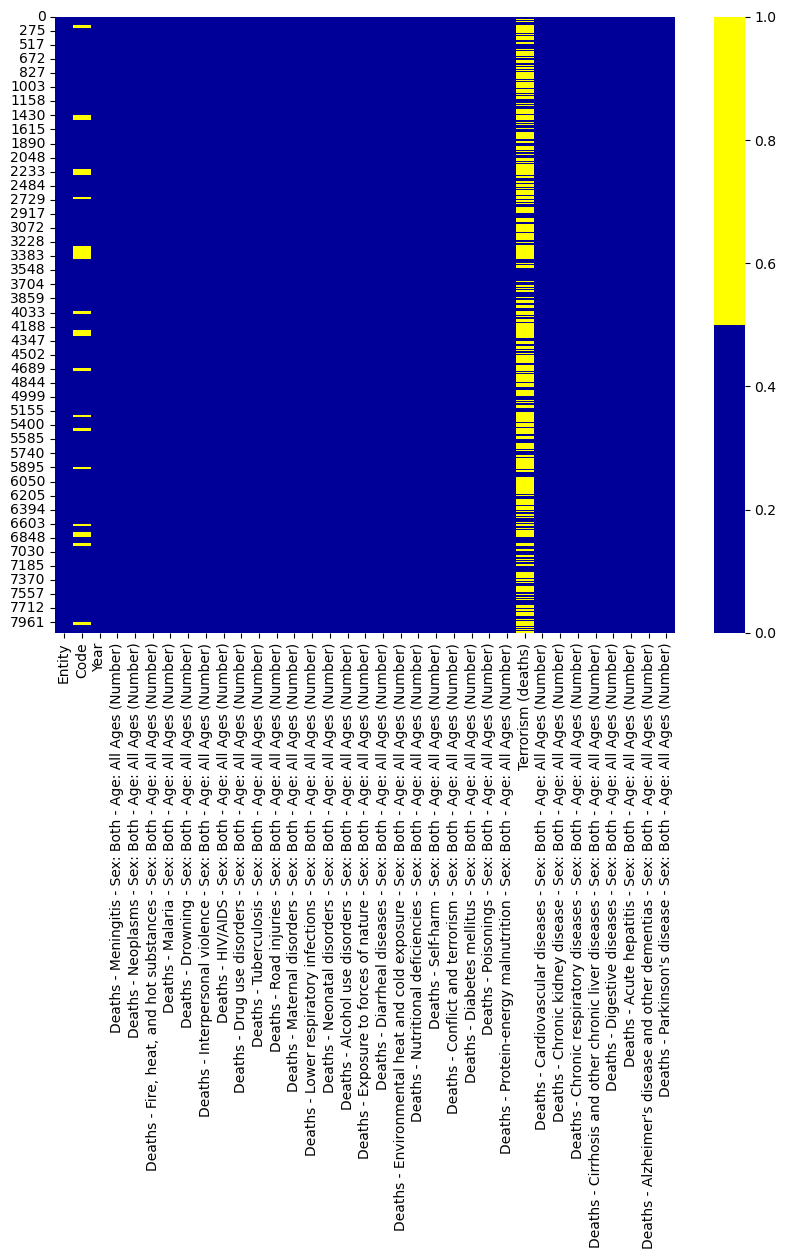

In [419]:
plt.figure(figsize=(10,8))
cols = filtered_df.columns
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(filtered_df[cols].isna(), cmap=sns.color_palette(colours))

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [420]:
filtered_df.dtypes

Entity                                                                                       object
Code                                                                                         object
Year                                                                                          int64
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    float64
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     float64
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                float64
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       float64
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      float64
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                        float64
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)                                      float64


In [421]:
filtered_df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'America', 'American Samoa',
       'Andorra', 'Angola', 'Antigua And Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic',
       'Central Europe, Eastern Europe, And Central Asia',
       'Central Sub-Saharan Africa', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote D'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic Of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia & Pacific - World Bank Region',
       'Eastern Sub-Saharan Africa', 'Ecuador', 'Egypt', 'El Salvador',
     

In [422]:
filtered_df['Code'].unique()

array(['AFG', 'ALB', 'DZA', nan, 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN',
       'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO',
       'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD',
       'NZL', '

In [423]:
filtered_df.to_csv('Death Clean.csv')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?